In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,recall_score


#### Priminery Data Analysis
01. df.info() , df.description(),df.shape 
02. check missing values
03. check duplicated 
04. value_count()

In [3]:
#load data
df = pd.read_csv('../customerchurn_data/Churn_Modelling.csv')

In [4]:
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...             1.0       101348.88      1
1          2    15647311      Hill  ...             1.0       112542.58      0
2          3    15619304      Onio  ...             0.0       113931.57      1
3          4    15701354      Boni  ...             0.0        93826.63      0
4          5    15737888  Mitchell  ...             1.0        79084.10      0

[5 rows x 14 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

count          mean  ...           75%          max
RowNumber        10002.0  5.001500e+03  ...  7.501750e+03     10000.00
CustomerId       10002.0  1.569093e+07  ...  1.575323e+07  15815690.00
CreditScore      10002.0  6.505551e+02  ...  7.180000e+02       850.00
Age              10001.0  3.892231e+01  ...  4.400000e+01        92.00
Tenure           10002.0  5.012498e+00  ...  7.000000e+00        10.00
Balance          10002.0  7.649111e+04  ...  1.276478e+05    250898.09
NumOfProducts    10002.0  1.530194e+00  ...  2.000000e+00         4.00
HasCrCard        10001.0  7.055294e-01  ...  1.000000e+00         1.00
IsActiveMember   10001.0  5.149485e-01  ...  1.000000e+00         1.00
EstimatedSalary  10002.0  1.000833e+05  ...  1.493837e+05    199992.48
Exited           10002.0  2.037592e-01  ...  0.000000e+00         1.00

[11 rows x 8 columns]

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#dealing with missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
4          5    15737888  Mitchell  ...             1.0        79084.10      0
6          7    15592531  Bartlett  ...             1.0        10062.80      0
8          9    15792365        He  ...             NaN        74940.50      0
9         10    15592389        H?  ...             1.0        71725.73      0

[4 rows x 14 columns]

In [10]:
df.duplicated().sum()

np.int64(2)

In [11]:
df = df.drop_duplicates()

In [12]:
customer_data = df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
df.shape

(10000, 11)

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
df['Geography'].value_counts()

Geography
France     5013
Germany    2509
Spain      2477
Name: count, dtype: int64

In [17]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [18]:
#Handle missing value 
# since both numerical and categorical data missing use both simpleImputer 
num_columns = df.select_dtypes(include=['number']).columns
cat_columns  = df.select_dtypes(include=['object','category']).columns

imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='most_frequent') 

df[num_columns] = imputer_num.fit_transform(df[num_columns])
df[cat_columns] = imputer_cat.fit_transform(df[cat_columns])



### Visualization

01. pairplot - corralation check
02. boxplot - outliers
03. histrogram - distribusion
04. 

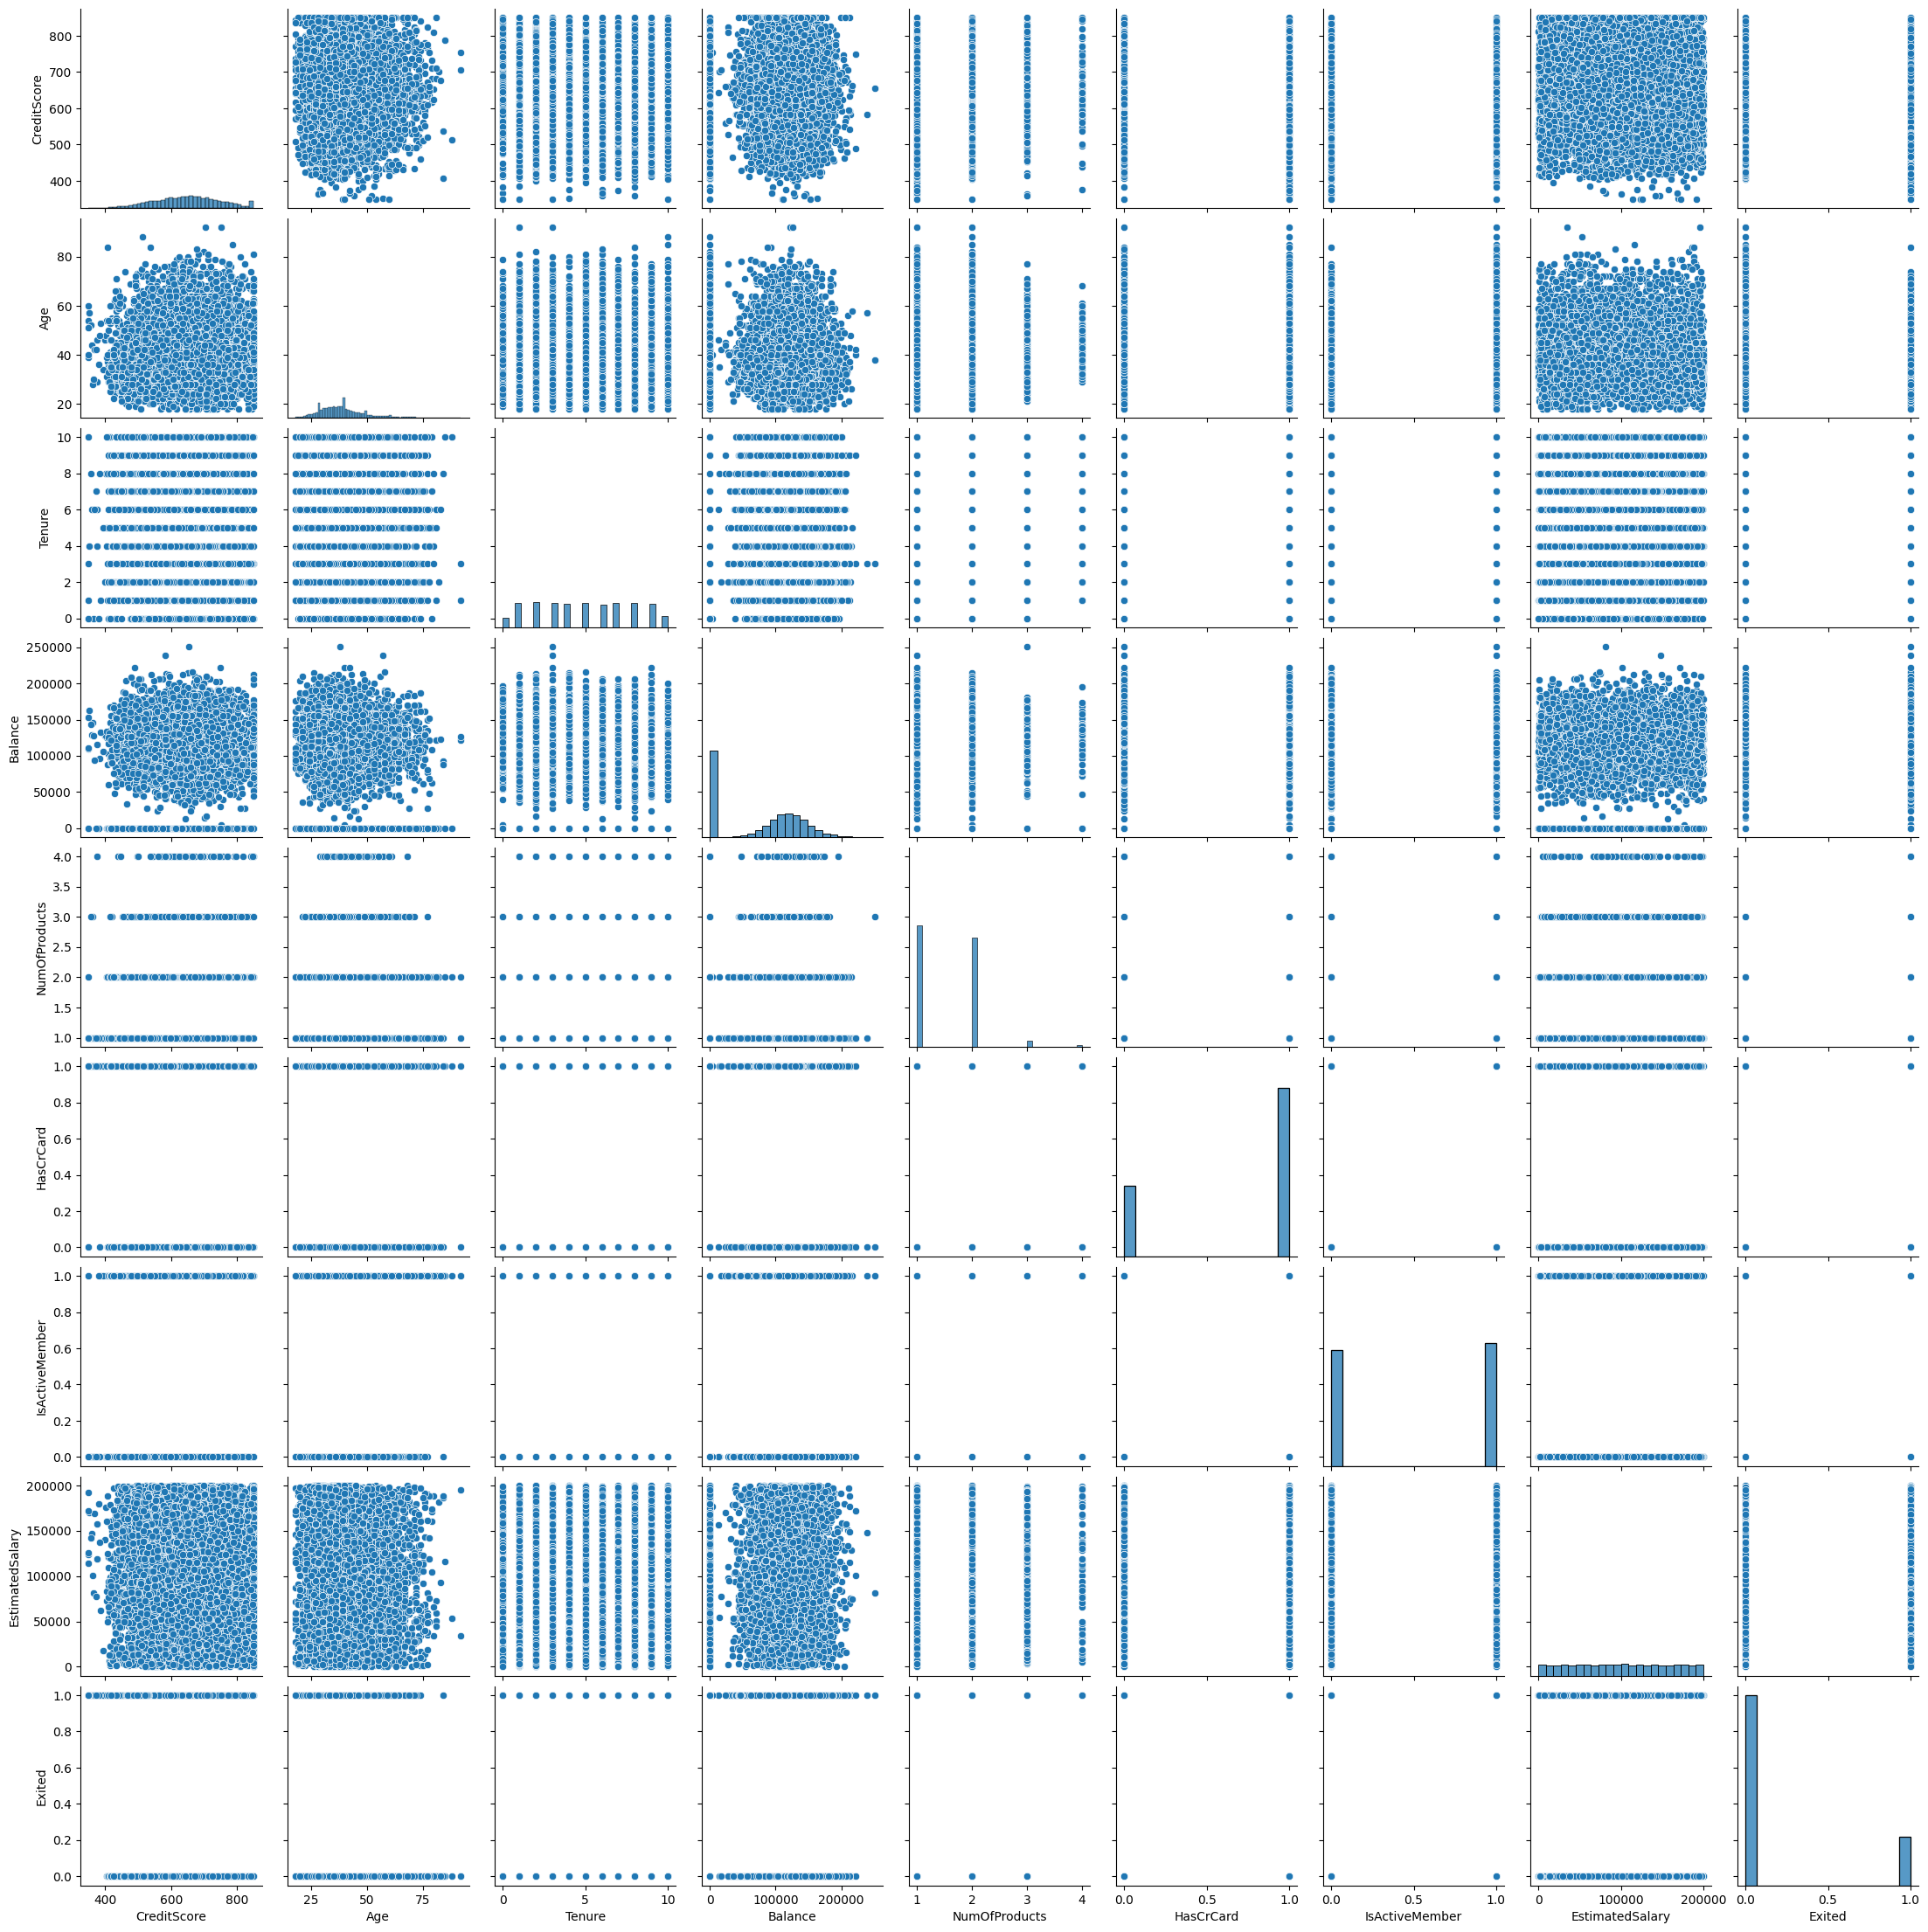

In [19]:
sns.pairplot(df)

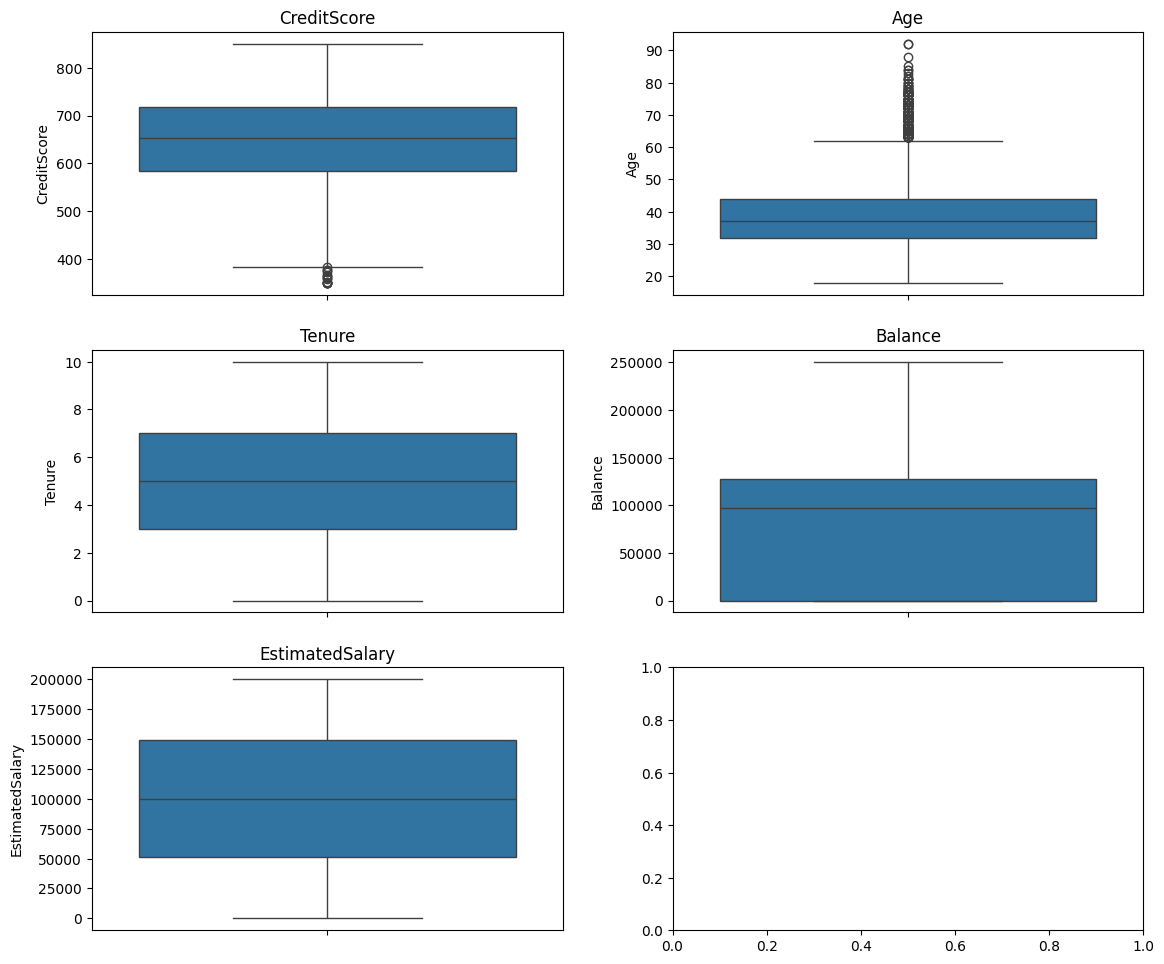

In [20]:
fig, axes = plt.subplots(3,2 , figsize = (12,10))
axes = axes.flatten()
col = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

for i in range(len(col)):
    sns.boxplot(y=df[col[i]],ax=axes[i])
    axes[i].set_title(col[i])


plt.tight_layout(pad=2.0)
plt.show()
      
    


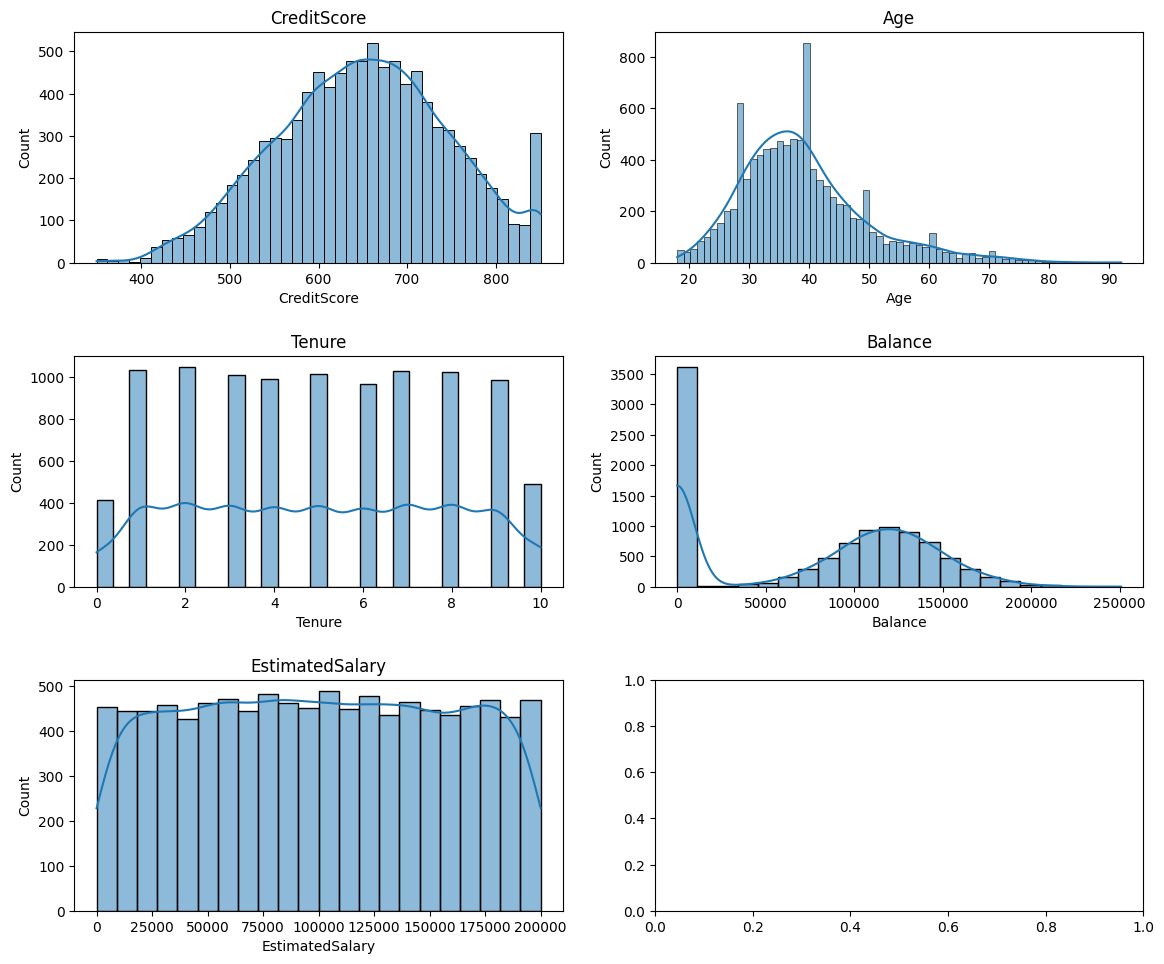

In [21]:
fig , axes = plt.subplots(3,2 , figsize=(12,10))
axes = axes.flatten()

for i in range(len(col)):
    sns.histplot(df[col[i]],kde=True, ax = axes[i])
    axes[i].set_title(col[i])
    
plt.tight_layout(pad=2.0)
plt.show()

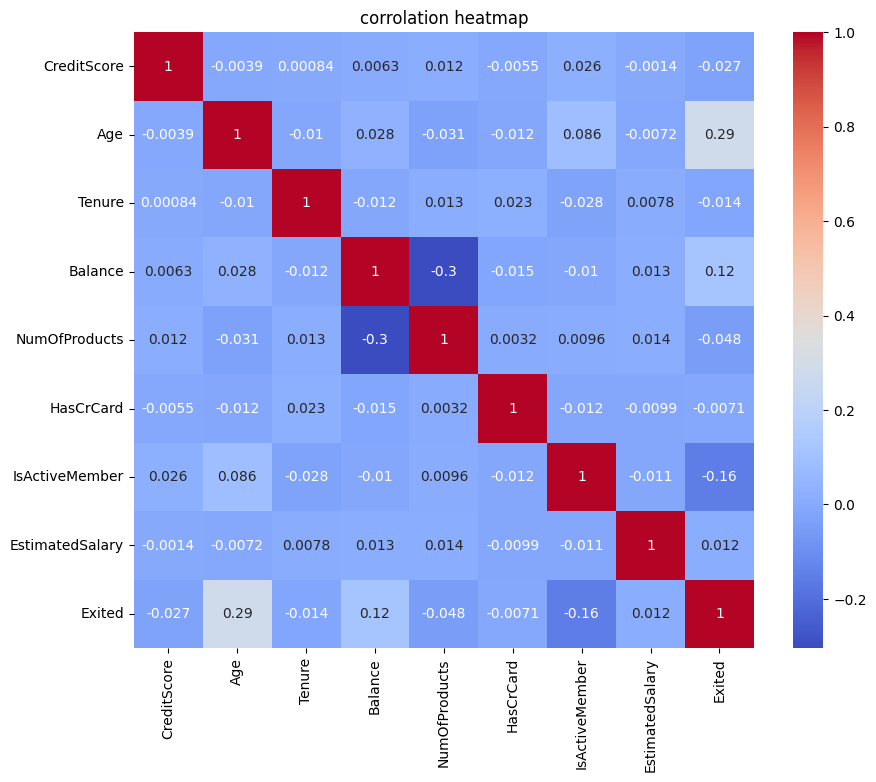

In [22]:
# check the corrolation

numarical_col = df.select_dtypes(include=['int64','float64'])

corr_matrix =  numarical_col.corr()

#plot the heat map

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("corrolation heatmap")
plt.show()

steps to follow 
01. drop columns 'RowNumber','CustomerId','Surname' --> save a seperate data file if needed for reference 
02. seperate target and features (X,y)
03. Missing value treat
04. split the data to train test 
05. Gender and Geography column can convert to numerical values. 
 

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [24]:
X.head()

CreditScore Geography  Gender  ...  HasCrCard  IsActiveMember  EstimatedSalary
0        619.0    France  Female  ...        1.0             1.0        101348.88
1        608.0     Spain  Female  ...        0.0             1.0        112542.58
2        502.0    France  Female  ...        1.0             0.0        113931.57
3        699.0    France  Female  ...        0.0             0.0         93826.63
4        850.0     Spain  Female  ...        1.0             1.0         79084.10

[5 rows x 10 columns]

In [25]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

In [26]:
lable_encoder = LabelEncoder()

X['Gender'] = lable_encoder.fit_transform(df['Gender'])

X = pd.get_dummies(X,columns=['Geography'],drop_first=True)
geo_col = [col for col in X.columns if col.startswith('Geography_')]
X[geo_col] = X[geo_col].astype(int)

X.head() 

CreditScore  Gender  ...  Geography_Germany  Geography_Spain
0        619.0       0  ...                  0                0
1        608.0       0  ...                  0                1
2        502.0       0  ...                  0                0
3        699.0       0  ...                  0                0
4        850.0       0  ...                  0                1

[5 rows x 11 columns]

In [27]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [28]:
#splitting 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [29]:
# data scaling

#columns to consider for different scales
standarScaler_col = ['CreditScore'] # has normal distribution and mild outliers. 
robustScaler_col = ['Age','Balance','EstimatedSalary'] # skewed distibusions high outliers, fiarly uniform distributions
minmaxScaler_col = ['Tenure','NumOfProducts'] # this featurte in number of years. minmax will best suited to smoothly conver. 

#initiate scales
standardscaler = StandardScaler()
robustscaler = RobustScaler()
minmaxscaler = MinMaxScaler()


In [30]:
X_trained_scaled = X_train.copy()
X_trained_scaled[standarScaler_col] = standardscaler.fit_transform(X_train[standarScaler_col])
X_trained_scaled[robustScaler_col] = robustscaler.fit_transform(X_train[robustScaler_col])
X_trained_scaled[minmaxScaler_col] = minmaxscaler.fit_transform(X_train[minmaxScaler_col])

In [31]:
X_trained_scaled.head()

CreditScore  Gender  ...  Geography_Germany  Geography_Spain
2151     1.058568       1  ...                  0                0
8392     0.913626       1  ...                  1                0
5006     1.079274       0  ...                  1                0
4117    -0.929207       1  ...                  0                0
7182     0.427035       1  ...                  1                0

[5 rows x 11 columns]

In [32]:
# test data transform
X_test_scaled = X_test.copy()
X_test_scaled[standarScaler_col] = standardscaler.transform(X_test[standarScaler_col])
X_test_scaled[robustScaler_col] = robustscaler.transform(X_test[robustScaler_col])
X_test_scaled[minmaxScaler_col] = minmaxscaler.transform(X_test[minmaxScaler_col])
X_test_scaled.head()

CreditScore  Gender  ...  Geography_Germany  Geography_Spain
5702    -0.680735       1  ...                  0                0
3667    -1.301915       1  ...                  1                0
1617    -0.970619       0  ...                  0                1
5673    -0.121674       1  ...                  0                1
4272    -0.111321       0  ...                  0                1

[5 rows x 11 columns]

In [33]:
# build models dictinory and its relavent parameters

models:dict = {
    "logistic_Reg" : LogisticRegression(verbose=1),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest" : RandomForestClassifier(verbose=1),
    #"gradiant_boosting": GradientBoostingClassifier(verbose=1),
    #"svc":SVC(verbose=1),
    "xgboost":XGBClassifier(),
    "catboost":CatBoostClassifier()
    
}

params:dict = {
    
    "logistic_Reg":{
                    "penalty":['l2'],
                    #"C":[0.01,0.1,1],
                    "class_weight":['balanced']
                    },
    "decision_tree":{
                    "criterion":['gini','entropy'],
                    "max_depth":[3,5,10,None]
                    },
    "random_forest":{'n_estimators':[8,16,32,64,128],
                     'criterion':['gini','entropy'],
                     "class_weight":['balanced']
                     
                     },
    "xgboost":      {
                    'n_estimators':[8,16,32,64,128],
                    'learning_rate':[0.01,0.05,0.1],
        
                    },
    "catboost":     {
                    'iterations':[100,300],
                    'learning_rate':[0.01,0.05,0.1]
        
                    }
    
    
    
    
}

In [34]:
def evaluate_model(X_train,y_train,X_test,y_test,models,params):
    try:
        report = {}
        
        for i in range(len(list(models))):
            model = list(models.values())[i]
            param = params[list(models.keys())[i]]
            
            gs = GridSearchCV(model,param,cv=3)
            gs.fit(X_train,y_train)
            
            model.set_params(**gs.best_params_)
            model.fit(X_train,y_train)
            
            #y_train_pred = model.predict(X_train)
            
            y_test_pred =  model.predict(X_test)
            
            #train_model_score = r2_score(y_train,y_train_pred)
            
            test_model_score = recall_score(y_test,y_test_pred)
            
            
            report [list(models.keys())[i]] = test_model_score
        
        return report
        
    except Exception:
        raise Exception 


In [35]:
model_report:dict = evaluate_model(X_train = X_trained_scaled,y_train = y_train,X_test = X_test_scaled,y_test=y_test,
                                   models=models,params=params)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]

0:	learn: 0.6880467	total: 47.2ms	remaining: 4.67s
1:	learn: 0.6833469	total: 48.1ms	remaining: 2.36s
2:	learn: 0.6785657	total: 48.8ms	remaining: 1.58s
3:	learn: 0.6738629	total: 49.4ms	remaining: 1.18s
4:	learn: 0.6689678	total: 50.1ms	remaining: 953ms
5:	learn: 0.6643282	total: 50.9ms	remaining: 797ms
6:	learn: 0.6597764	total: 51.6ms	remaining: 686ms
7:	learn: 0.6552017	total: 52.4ms	remaining: 602ms
8:	learn: 0.6505948	total: 53.1ms	remaining: 537ms
9:	learn: 0.6461457	total: 53.9ms	remaining: 485ms
10:	learn: 0.6419694	total: 54.6ms	remaining: 442ms
11:	learn: 0.6376978	total: 55.4ms	remaining: 406ms
12:	learn: 0.6335812	total: 56.2ms	remaining: 376ms
13:	learn: 0.6294590	total: 57ms	remaining: 350ms
14:	learn: 0.6256484	total: 57.8ms	remaining: 328ms
15:	learn: 0.6217542	total: 58.6ms	remaining: 308ms
16:	learn: 0.6179351	total: 59.4ms	remaining: 290ms
17:	learn: 0.6142858	total: 60.2ms	remaining: 274ms
18:	learn: 0.6105228	total: 60.9ms	remaining: 260ms
19:	learn: 0.6068373	tot

In [36]:
model_report

{'logistic_Reg': 0.7002457002457002,
 'decision_tree': 0.45454545454545453,
 'random_forest': 0.4594594594594595,
 'xgboost': 0.48894348894348894,
 'catboost': 0.5110565110565111}